In [1]:
import torch

In [2]:
# Building from scratch
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

def forward(x):
    y=w*x+b # linear regression line
    return y

# Before learning biases and weights in the model, lets see how to predict in PyTorch
x = torch.tensor([1.0])
yhat = forward(x)
print(yhat)

# Multiple values to predict
x = torch.tensor([[1],[2]])
yhat = forward(x)
print(yhat)

tensor([1.], grad_fn=<AddBackward0>)
tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [3]:
# Using Linear package
from torch.nn import Linear
torch.manual_seed(1)
model = Linear(in_features = 1, out_features = 1)
print("Model Parameters:", list(model.parameters())) # Just randomly building a linear regressionmodel
# Model build here is yhat = -0.44 + 0.51x

# Getting a prediction
x = torch.tensor([0.0])
yhat = model(x)
print("prediction by package model", yhat)

Model Parameters: [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
prediction by package model tensor([-0.4414], grad_fn=<AddBackward0>)


## Training LR model from sratch

In [4]:
# Training a sample model from scratch - non intercept model

w = torch.tensor(-10.0, requires_grad = True) # This make sure 
X = torch.arange(-3,3,0.1).view(-1,1)
f = -3*X

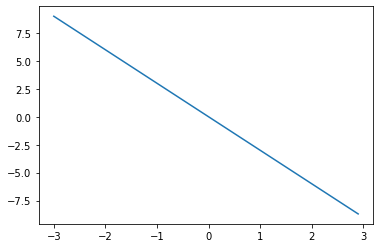

In [5]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show()

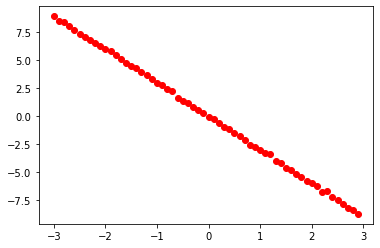

In [6]:
Y = f + 0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [7]:
def forward(x):
    return w*x # Yhat = wx

def criterion(yhat,y):
    return torch.mean((yhat-y)**2) # cost function

lr = 0.1
COST = []
for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat,Y)
    loss.backward()
    w.data = w.data-lr*w.grad.data #.data helps to access the data in the variable
    print(w.grad.data)
    w.grad.data.zero_() 
    # We set the gradient to zero for the next iteration, this is due to the fact that Pytorch calculates the gradient in a iterative manner.
    print(w.grad.data)
    COST.append(loss.item())

tensor(-42.0211)
tensor(0.)
tensor(-16.7944)
tensor(0.)
tensor(-6.7122)
tensor(0.)
tensor(-2.6826)
tensor(0.)


# Stochastic Gradient Descent & Mini batch Gradient Descent

When batch size is 1 then it is stochastic gradient descent and when batch size is greater than 1 then it is called Mini-batch gradient descent.

In [8]:
# Stochastic gradient descent in PyTorch
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)

X = torch.arange(-3,3,0.1).view(-1,1)
f = -3*X
Y = f+0.1*torch.randn(X.size())
def forward(x):
    return w*x + b # Yhat = wx + b

def criterion(yhat,y):
    return torch.mean((yhat-y)**2) # cost function

lr = 0.1
COST = []
for epoch in range(8):
    total = 0
    for x,y in zip(X,Y):
        yhat = forward(x)
        loss = criterion(yhat,y)
        loss.backward()
        w.data = w.data-lr*w.grad.data #.data helps to access the data in the variable
        b.data = b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
        # We set the gradient to zero for the next iteration, this is due to the fact that Pytorch calculates the gradient in a iterative manner.
        total+=loss.item()
    COST.append(total)


In [9]:
# SGD & Mini-Batch GD using dataloader

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y =-3*X+1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
dataset = Data()

trainloader = DataLoader(dataset = dataset, batch_size = 1) # if we take batch size>1 then this process becomes mini batch gradient descent
# This is a iterable on defined batch size of the dataset
# Implement SGD similar to above code
for x,y in trainloader:
    yhat=forward(x)
    loss=criterion(yhat,y)
    loss.backward()
    w.data = w.data-lr*w.grad.data #.data helps to access the data in the variable
    b.data = b.data-lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()    

## Optimization in PyTorch

This is a standard way to perform different variations of gradient descent in PyTorch.

In [10]:
# Creating a dataset object
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = 3*X+1
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
# Get the data
dataset = Data()

# Create the custom LR module
class LR(nn.Module):
    # Constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear=nn.Linear(input_size, output_size)
    
    # Prediction
    def forward(self,x):
        out = self.linear(x)
        return out
    
# Define the criterion function
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

# Build a cost function
criterion = nn.MSELoss()

# Set the trainloader form the Dataloader package
trainloader = DataLoader(dataset = dataset, batch_size=1)

# Set the model
model = LR(1,1)
model.state_dict()['linear.weight'][0] = 15 # start with random weight
model.state_dict()['linear.bias'][0] = -30 # start with random bias

from torch import nn, optim
# Set the optimizer function to perform the SGD
optimizer = optim.SGD(model.parameters(), lr = 0.01)
optimizer.state_dict()

# Train the model
COST = []
for epoch in range(10):
    total = 0
    for x,y in trainloader :
        yhat = model(x)
        loss = criterion(yhat,y)
        optimizer.zero_grad() # Setting the gradient to 0, this is due to how PyTorch calculates the gradient
        loss.backward()
        optimizer.step() # this performs the update on w and b
        total+=loss.item()
    COST.append(total)

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.4update_param.png" width="500" alt="Model Cost with optimizer" />

## Training, Validation and Test Split PyTorch

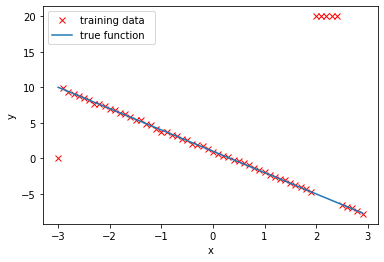

In [11]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

class Data(Dataset):
    def __init__(self, train = True):
        self.x=torch.arange(-3,3,0.1).view(-1,1)
        self.f=-3*self.x+1
        self.y=self.f + 0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]

        if train==True:
            self.y[0]=0 # inducing outlier
            self.y[50:55]=20 # inducing outlier
        
        else:
            pass
    
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
# Taking training and validation data
train_data = Data()
val_data = Data(train = False)


# Plot out training points
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
# Define the criterion
criterion = nn.MSELoss()

# Building custom LR model
class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return out
    
    
trainloader = DataLoader(dataset=train_data, batch_size=1)

# Give training parameters
epochs=10
learning_rates=[0.0001,0.001,0.01,0.1,1]
validation_error = torch.zeros(len(learning_rates))
train_error = torch.zeros(len(learning_rates))
MODELS=[]

from torch import optim
for i, learning_rate in enumerate(learning_rates):
    model = LR(1,1)
    optimizer = optim.SGD(model.parameters(), lr = learning_rate) # this is just for updating weights and biases
    
    # Below for loop is acts like model training
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # lets predict model results on train data and store it in the list
    yhat=model(train_data.x) # this is a trained model predicting on x
    # Note: In huge datasets, we will need to include a data loader loop through the data. If not we have to use Dataloader 
    loss=criterion(yhat,train_data.y)
    train_error[i]=loss.item()
    
    # Lets predict model results on validation and store it in the list
    yhat=model(val_data.x) # this is a trained model predicting on x
    # Note: In huge datasets, we will need to include a data loader loop through the data. If not we have to use Dataloader 
    loss=criterion(yhat,val_data.y)
    validation_error[i]=loss.item()  
    
    MODELS.append(model)
            

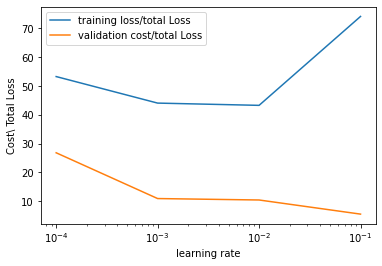

In [13]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[0.764638 ]
 [0.7620421]
 [0.7594462]]
i [[5.5568304]
 [5.439518 ]
 [5.322206 ]]
i [[6.600176 ]
 [6.4657087]
 [6.331241 ]]
i [[14.422781 ]
 [13.989331 ]
 [13.5558815]]
i [[nan]
 [nan]
 [nan]]


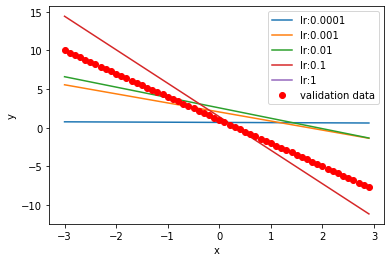

In [14]:
# Plot the predictions
i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Multiple Linear Regression

In [17]:
from torch.nn import Linear
torch.manual_seed(1)

model = Linear(in_features = 2, out_features = 1) #in_features = number of independent variables (total columns)
list(model.parameters())

X = torch.tensor([[1.0,1.0],[1.0,2.0],[1.0,3.0]])
yhat = model(X)




In [ ]:
# ====================Using custom module================
class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return out
        

# Training
from torch.utils.data import Dataset, DataLoader
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0],[1.0]])
        self.b = 1
        self.f = torch.mm(self.x,self.w)+self.b
        self.y = self.f + 0.1*torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
    
# Create a dataset object
data_set = Data2D()

# Create the criterion
criterion = nn.MSELoss()

# Create the trainloader object
trainloader = DataLoader(dataset=data_set, batch_size=2)

# Define the model
model = LR(input_size=2, output_size = 1)
optimizer = optim.SGD(model.parameters(), lr = 0.1)

LOSS = []
for epoch in range(100):
    for x,y in trainloader:
        yhat = model(x)
        loss = criterion(yhat,y)
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

## Linear Regression Multiple Outputs

In [22]:
from torch.nn import Linear
torch.manual_seed(1)

model = Linear(in_features = 2, out_features = 2)
x = torch.tensor([[1.0,2.0]])
yhat = model(x)
yhat

tensor([[-0.9256,  0.9508]], grad_fn=<AddmmBackward0>)

In [20]:
from torch.nn import Linear

In [24]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121],
         [-0.1371,  0.3319]], requires_grad=True),
 Parameter containing:
 tensor([-0.6657,  0.4241], requires_grad=True)]

In [34]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

model=linear_regression(3,2)
X=torch.tensor([[1.0,2.0,3.4],[1.0,2.0,1.0],[3.0,2.4,6.6]])
yhat=model(X)
yhat

tensor([[-0.9946, -1.0343],
        [-0.0203, -0.7981],
        [-3.2468, -2.2063]], grad_fn=<AddmmBackward0>)

the following figure represents the operation, where the red and blue  represents the different parameters, and the different shades of green represent  different samples.

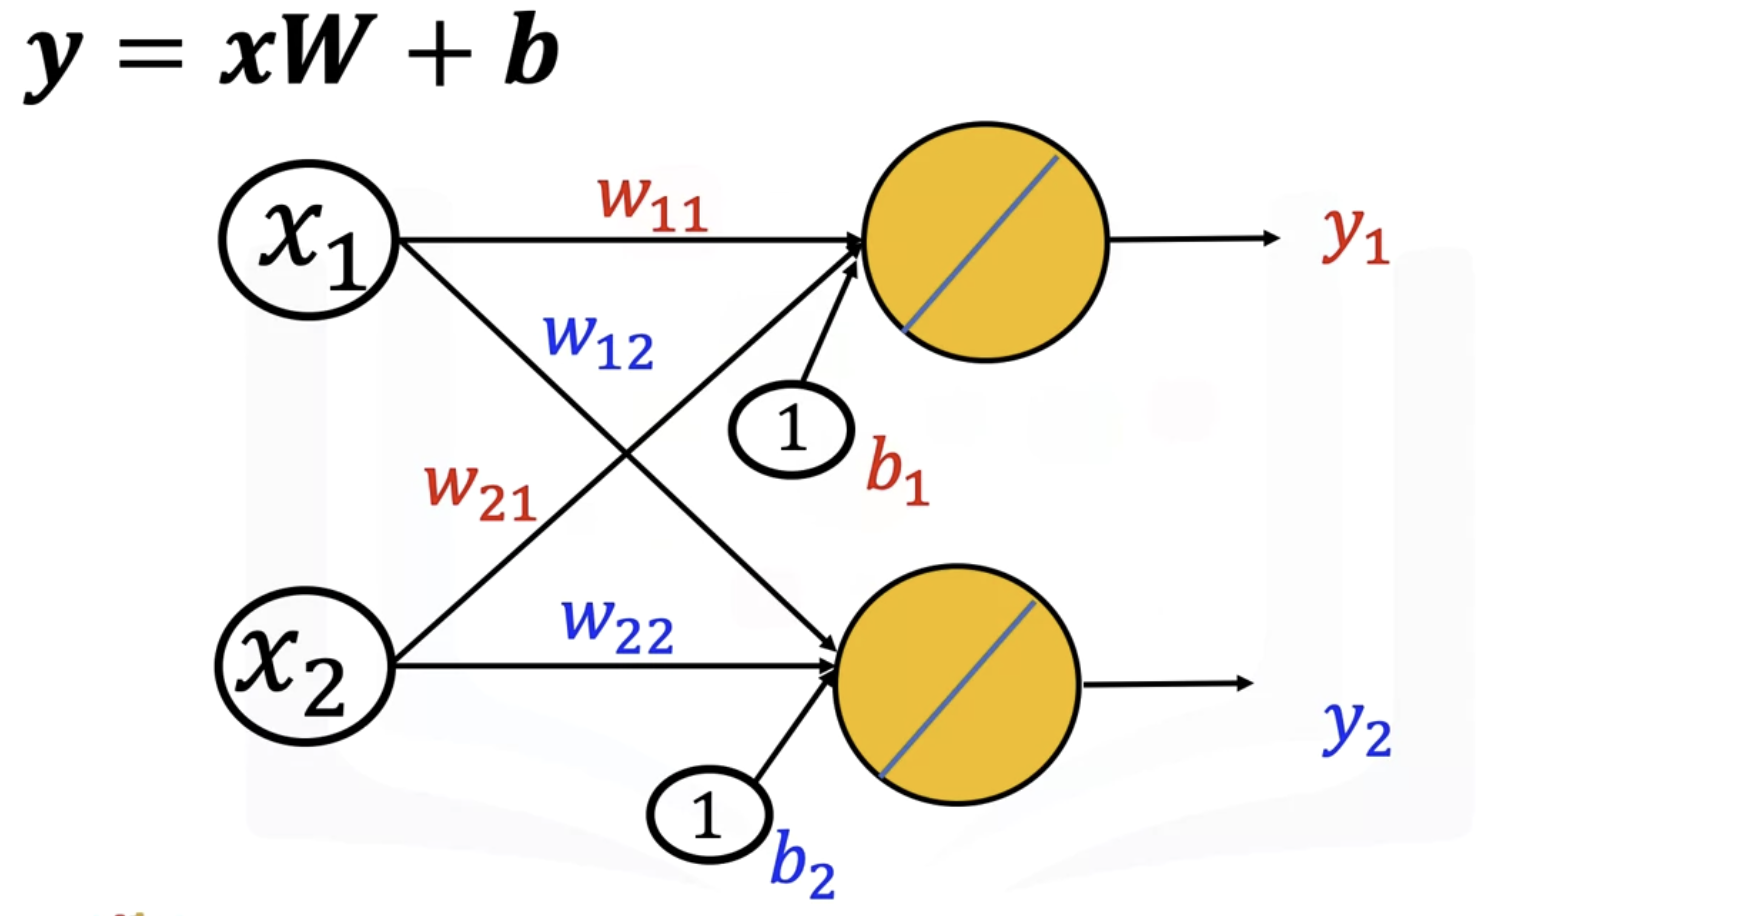

 <img src = "https://ibm.box.com/shared/static/768cul6pj8hc93uh9ujpajihnp8xdukx.png" width = 600, align = "center">

## Model Training - LR Multiple Outputs

Only difference here is that here the W is a matrix and b is a vector

In [66]:

# Give the seed 
torch.manual_seed(1)

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w=torch.tensor([[1.0,-1.0], [1.0,3.0]])
        self.b=torch.tensor([[1.0,-1.0]])
        self.f=torch.mm(self.x,self.w) + self.b
        
        self.y = self.f + 0.001 + torch.randn((self.x.shape[0]),1)
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len        

**Create the dataset object**

In [82]:
data_set = Data()

In [87]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

**Initialize the model**

In [88]:
model = linear_regression(2,2)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()

trainloader=DataLoader(dataset=data_set, batch_size=5)

**Train the model**

In [89]:
LOSS = []
epochs = 100

for epoch in range(epochs):
    for x,y in trainloader:
        #Make the predictions:
        yhat = model(x)
        #Calculate the loss:
        loss = criterion(yhat,y)
        #Store the loss
        LOSS.append(loss.item())
        #Clear the gradient
        optimizer.zero_grad()
        #Backward pass: Compute gradient w.r.t to all the learnable parameters
        loss.backward()
        # Apply step functions to update the parameters
        optimizer.step()
        # Remember the below updates are being made in the backend
        # w.data = w.data-lr*w.grad.data 
        # b.data = b.data-lr*b.grad.data

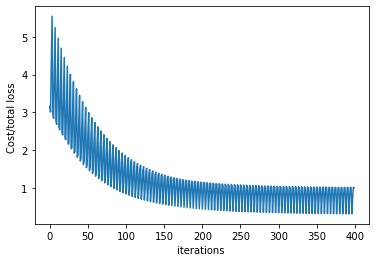

In [90]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()